# Signature
PAGE 593. Figure 14.25 represents two sets of points, the orange and green, in the same plot. In this instance these points represent two digitized versions of a handwritten S, extracted from the signature of a subject “Suresh.” Figure 14.26 shows the entire signatures from which these were extracted (third and fourth panels). The signatures are recorded dynamically using touch-screen devices, familiar sights in modern supermarkets. There are N = 96 points representing each S.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# define plots common properties and color constants
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY1, GRAY4, GRAY7 = '#231F20', '#646369', '#929497'

## Load and Prepare Data

In [2]:
df = pd.read_csv('../data/signature.csv', sep=',')
df.head()

,sig1.x,sig1.y,sig2.x,sig2.y,sig3.x,sig3.y
0,-284.9896,-140.2292,-301.4167,-71.3021,-288.3125,-71.7604
1,-269.9896,-133.2292,-288.4167,-64.3021,-265.3125,-58.7604
2,-249.9896,-122.2292,-266.4167,-51.3021,-242.3125,-45.7604
3,-228.9896,-110.2292,-241.4167,-38.3021,-220.3125,-32.7604
4,-207.9896,-98.2292,-215.4167,-23.3021,-199.3125,-20.7604


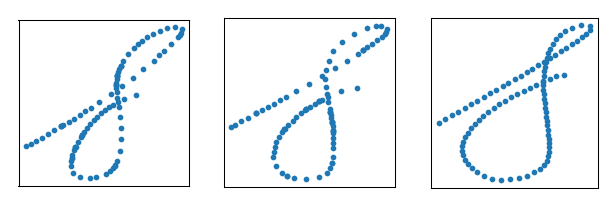

In [3]:
fig, axarr = plt.subplots(1, 3, figsize=(5, 1.5), dpi=150)
for i in range(3):
    ax = axarr[i]
    ax.scatter(
        df[f'sig{i+1}.x'].values, df[f'sig{i+1}.y'].values, s=3)
    ax.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False)
    ax.set_aspect('equal')

## Procrustes Transformation

In [4]:
from scipy.spatial.transform import Rotation as R
from scipy.spatial import procrustes

In [5]:
X1 = df[['sig2.x', 'sig2.y']].values
X2 = df[['sig3.x', 'sig3.y']].values
# rotate and shift signatures to make the task more difficult
X1[:, 0] += 500
X2 = R.from_euler(
    'z', -42, degrees=True
).apply(np.c_[X2, np.zeros(X1.shape[0])])[:, :-1]

In [6]:
# do procrustes transformation
X1_, X2_, disparity = procrustes(X1, X2)

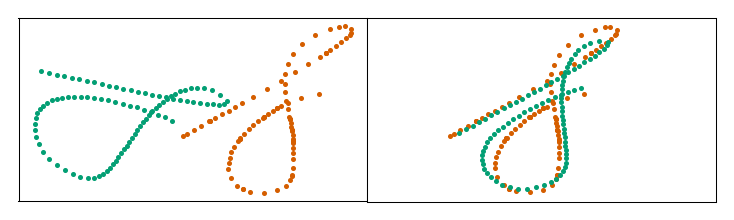

In [7]:
# PAGE 539. FIGURE 14.25. (Left panel:) Two different digitized handwritten Ss,
#           each represented by 96 corresponding points in R^2. The green S has
#           been deliberately rotated and translated for visual effect.
#           (Right panel:) A Procrustes transformation applies a translation
#           and rotation to best match up the two set of points.
fig, axarr = plt.subplots(1, 2, figsize=(6, 3), dpi=150)
plt.subplots_adjust(wspace=0)
ax = axarr[0]
ax.scatter(X1[:, 0], X1[:, 1], s=2, color='#D55E00')
ax.scatter(X2[:, 0], X2[:, 1], s=2, color='#039F74')
ax.set_aspect('equal')
ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

ax = axarr[1]
ax.scatter(X1_[:, 0], X1_[:, 1], s=2, color='#D55E00')
ax.scatter(X2_[:, 0], X2_[:, 1], s=2, color='#039F74')
ax.set_xlim(-0.305, 0.305)
ax.set_aspect('equal')
ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

## Shape Averaging

In [8]:
# iteratively find average shape
L = [df[[f'sig{i+1}.x', f'sig{i+1}.y']].values for i in range(3)]
M = L[0]
L_ = None
for i in range(100):
    L_ = [procrustes(M, X)[1] for X in L]
    M = np.mean(np.dstack(L_), axis=-1)

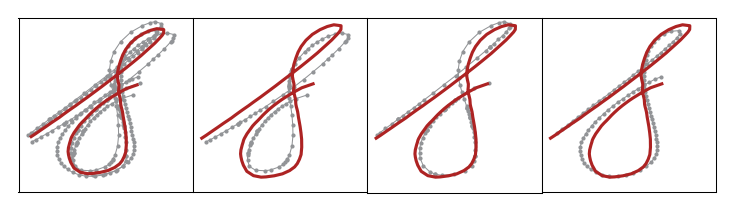

In [9]:
# PAGE 541. FIGURE 14.26. The Procrustes average of three versions of the
#           leading S in Suresh’s signatures. The left panel shows the preshape
#           average, with each of the shapes X′ℓ in preshape space
#           superimposed. The right three panels map the preshape M separately
#           to match each of the original S’s.
fig, axarr = plt.subplots(1, 4, figsize=(6, 2), dpi=150)
plt.subplots_adjust(wspace=0)
for i in range(4):
    ax = axarr[i]
    ax.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False)
    ax.set_aspect('equal')
    if i > 0:
        X_, M_, _ = procrustes(M, L[i-1])
        ax.plot(M_[:, 0], M_[:, 1], linewidth=0.5, color=GRAY7)
        ax.scatter(M_[:, 0], M_[:, 1], s=1, color=GRAY7)
        ax.plot(X_[:, 0], X_[:, 1], color='#AD2323')
    else:
        for X_ in L_:
            ax.plot(X_[:, 0], X_[:, 1], linewidth=0.5, color=GRAY7)
            ax.scatter(X_[:, 0], X_[:, 1], s=1, color=GRAY7)
        ax.plot(M[:, 0], M[:, 1], color='#AD2323')
    ax.set_xlim(-0.17, 0.17)
    ax.set_ylim(-0.17, 0.17)